# Building a Conversational Agent with Context Awareness

## Overview
This tutorial outlines the process of creating a conversational agent that maintains context across multiple interactions. We'll use a modern AI framework and different approaches to build an agent capable of engaging in more natural and coherent conversations.

## Motivation
Many simple chatbots lack the ability to maintain context, leading to disjointed and frustrating user experiences. This tutorial aims to solve that problem by implementing a conversational agent that can remember and refer to previous parts of the conversation, enhancing the overall interaction quality.


## Conclusion
These approach to creating a conversational agent offers several advantages:
- **Context Awareness**: The agent can refer to previous parts of the conversation, leading to more natural interactions.
- **Simplicity**: The modular design keeps the implementation straightforward.
- **Flexibility**: It's easy to modify the conversation structure or switch to a different language model.
- **Scalability**: The session-based approach allows for managing multiple independent conversations.

With this foundation, you can further enhance the agent by:
- Implementing more sophisticated prompt engineering
- Integrating it with external knowledge bases
- Adding specialized capabilities for specific domains
- Incorporating error handling and conversation repair strategies

By focusing on context management, this conversational agent design significantly improves upon basic chatbot functionality, paving the way for more engaging and helpful AI assistants.

# Conversational Agent Tutorial
### Approach 1

## Key Components
1. **Language Model**: The core AI component that generates responses.
2. **Prompt Template**: Defines the structure of our conversations.
3. **History Manager**: Manages conversation history and context.
4. **Message Store**: Stores the messages for each conversation session.

## Method Details

### Setting Up the Environment
Begin by setting up the necessary AI framework and ensuring access to a suitable language model. This forms the foundation of our conversational agent.

### Creating the Chat History Store
Implement a system to manage multiple conversation sessions. Each session should be uniquely identifiable and associated with its own message history.

### Defining the Conversation Structure
Create a template that includes:
- A system message defining the AI's role
- A placeholder for conversation history
- The user's input

This structure guides the AI's responses and maintains consistency throughout the conversation.

### Building the Conversational Chain
Combine the prompt template with the language model to create a basic conversational chain. Wrap this chain with a history management component that automatically handles the insertion and retrieval of conversation history.

### Interacting with the Agent
To use the agent, invoke it with a user input and a session identifier. The history manager takes care of retrieving the appropriate conversation history, inserting it into the prompt, and storing new messages after each interaction.

In [15]:
# Initialize a ChatModel in a single line using the model's name and provider.
from langchain.chat_models import init_chat_model

# RunnableWithMessageHistory wraps another Runnable and manages the chat message history for it;
# It is responsible for reading and updating the chat message history.
from langchain_core.runnables.history import RunnableWithMessageHistory

# Abstract base class for storing chat message history.
from langchain_core.chat_history import BaseChatMessageHistory

# Stores the chat message history in different stores.
from langchain.memory import ChatMessageHistory


# create flexible templated prompts for chat models
from langchain_core.prompts import ChatPromptTemplate

# Prompt template that assumes variable is already list of messages.
# A placeholder which can be used to pass in a list of messages.
from langchain_core.prompts import MessagesPlaceholder

Load Enviornment Variables

In [16]:
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv(dotenv_path="../.env", verbose=True)

# # Retrieve the key
# openai_key = os.getenv('OPENAI_API_KEY')

# # Check if it exists
# if openai_key:
#     print(f"API Key found: {openai_key}")
# else:
#     print("API Key not found. Please check your .env file.")

True

Addtional configurations in environment file from langsmith https://smith.langchain.com/

In [ ]:
# os.getenv('LANGSMITH_TRACING')
# os.getenv('LANGSMITH_API_KEY')
# os.getenv('LANGSMITH_WORKSPACE_ID')
# os.getenv('LANGSMITH_PROJECT')

### Initialize the language model

https://platform.openai.com/docs/models/gpt-4.1-nano non reasoning model ,which is fast, cost effective and get work done for non complex tasks

In [18]:
#Instantiate
llm=init_chat_model(
    "openai:gpt-4.1-nano",
    temperature=0,
    max_tokens=1000,
    timeout=None,
    max_retries=2                  
)

### Define logic to store chat message history

In [19]:
store:dict[str, BaseChatMessageHistory]={}

def get_chat_history(session_id: str)->BaseChatMessageHistory:
    """ Add ChatMessageHistory to the store """
    if session_id not in store:
        store[session_id] = ChatMessageHistory()
    return store[session_id]

In [20]:
store

{}

### Create the prompt template


In [21]:
prompt = ChatPromptTemplate([
    ("system", "You are a helpful AI assistant."),
    # the template recieve an optional list of messages under the 'history' key
    ("placeholder", "{history}"),
    # Equvialent to: MessagesPlaceholder(variable_name="history"),
    ("human", "{input}")
])

In [22]:
prompt.dict()

{'name': None,
 'input_variables': ['input'],
 'optional_variables': ['history'],
 'output_parser': None,
 'partial_variables': {'history': []},
 'metadata': None,
 'tags': None,
 'messages': [{}, {}, {}],
 'validate_template': False,
 '_type': 'chat'}

### Combine the prompt and model into a runnable chain


In [23]:
chain = prompt | llm

### Wrap the chain with message history


In [24]:
chain_with_history = RunnableWithMessageHistory(
    chain,
    get_chat_history,
    input_messages_key="input",
    history_messages_key="history"
)

### Example usage

In [25]:
session_id = "user_123"


response = chain_with_history.invoke(
    {"input": "Hello! How are you?"},
    config={"configurable": {"session_id": session_id}}
)
print("AI:", response.content)




AI: Hello! I'm doing well, thank you. How can I assist you today?


In [26]:
response.dict()

C:\Users\riahl\AppData\Local\Temp\ipykernel_14448\3202056457.py:1: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  response.dict()


{'content': "Hello! I'm doing well, thank you. How can I assist you today?",
 'additional_kwargs': {'refusal': None},
 'response_metadata': {'token_usage': {'completion_tokens': 16,
   'prompt_tokens': 24,
   'total_tokens': 40,
   'completion_tokens_details': {'accepted_prediction_tokens': 0,
    'audio_tokens': 0,
    'reasoning_tokens': 0,
    'rejected_prediction_tokens': 0},
   'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
  'model_name': 'gpt-4.1-nano-2025-04-14',
  'system_fingerprint': 'fp_7c233bf9d1',
  'id': 'chatcmpl-CG1wNNzAgnZuNE7epy0oh9bKptLRz',
  'service_tier': 'default',
  'finish_reason': 'stop',
  'logprobs': None},
 'type': 'ai',
 'name': None,
 'id': 'run--82cc6b94-9dae-4425-af2d-e7d25b566b2f-0',
 'example': False,
 'tool_calls': [],
 'invalid_tool_calls': [],
 'usage_metadata': {'input_tokens': 24,
  'output_tokens': 16,
  'total_tokens': 40,
  'input_token_details': {'audio': 0, 'cache_read': 0},
  'output_token_details': {'audio': 0, 'reason

In [27]:
# ChatMessageHistory added to store
store['user_123'].messages[0:]

[HumanMessage(content='Hello! How are you?', additional_kwargs={}, response_metadata={}),
 AIMessage(content="Hello! I'm doing well, thank you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 24, 'total_tokens': 40, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_7c233bf9d1', 'id': 'chatcmpl-CG1wNNzAgnZuNE7epy0oh9bKptLRz', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--82cc6b94-9dae-4425-af2d-e7d25b566b2f-0', usage_metadata={'input_tokens': 24, 'output_tokens': 16, 'total_tokens': 40, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]

On the initial request, session_id history is {} since no prior conversation exists.

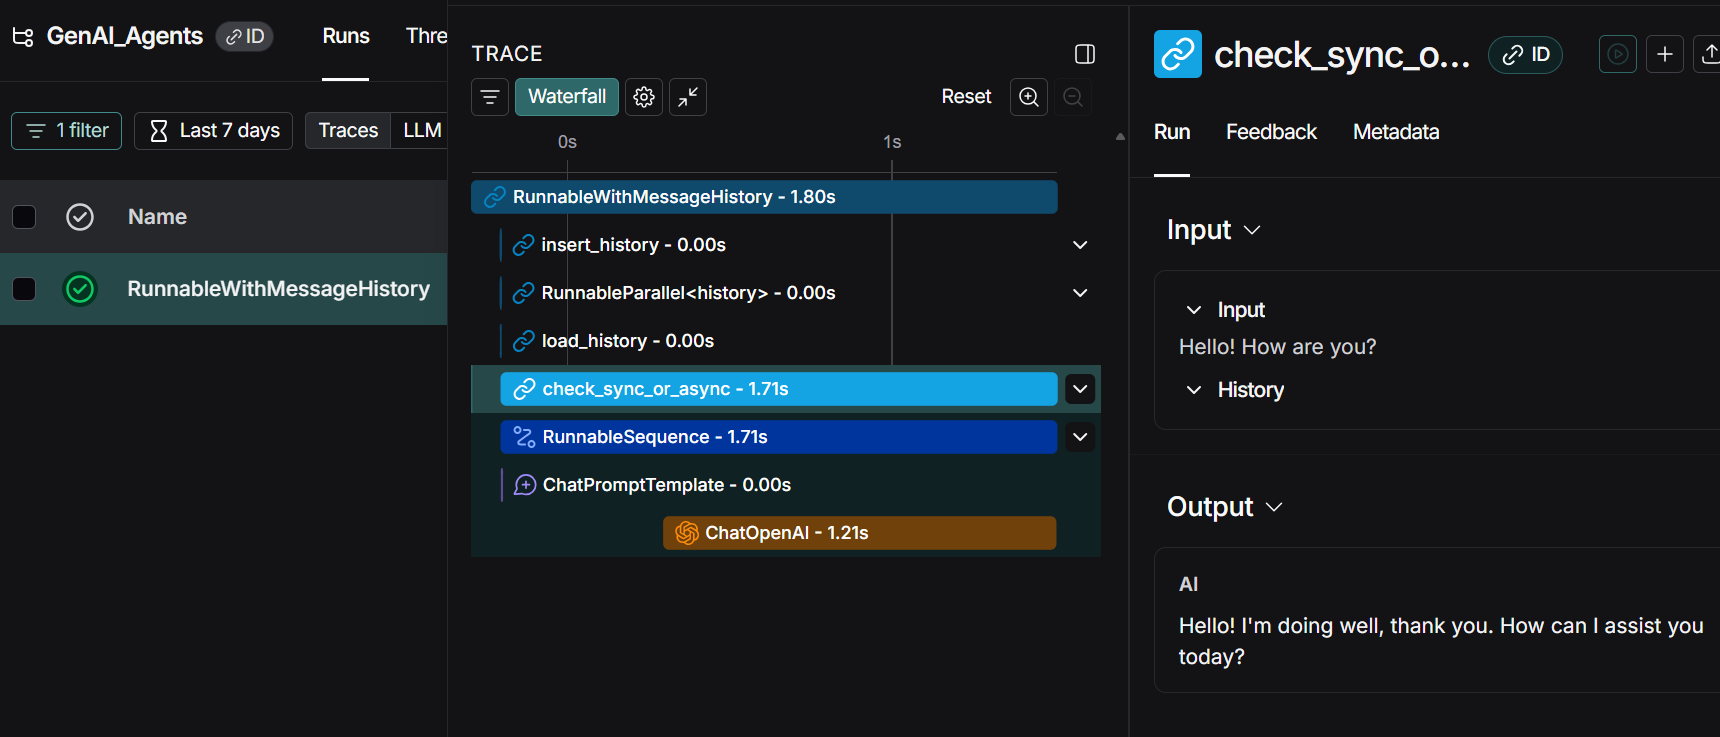

In [28]:
response2 = chain_with_history.invoke(
    {"input": "What was my previous message?"},
    config={"configurable": {"session_id": session_id}}
)
print("AI:", response2.content)

AI: Your previous message was: "Hello! How are you?"


In [29]:
store['user_123'].messages

[HumanMessage(content='Hello! How are you?', additional_kwargs={}, response_metadata={}),
 AIMessage(content="Hello! I'm doing well, thank you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 24, 'total_tokens': 40, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_7c233bf9d1', 'id': 'chatcmpl-CG1wNNzAgnZuNE7epy0oh9bKptLRz', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--82cc6b94-9dae-4425-af2d-e7d25b566b2f-0', usage_metadata={'input_tokens': 24, 'output_tokens': 16, 'total_tokens': 40, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content='What was my previous me

### Print the conversation history

In [30]:
print("\nConversation History:")
for message in store[session_id].messages:
    print(f"{message.type}: {message.content}")


Conversation History:
human: Hello! How are you?
ai: Hello! I'm doing well, thank you. How can I assist you today?
human: What was my previous message?
ai: Your previous message was: "Hello! How are you?"


In the second response, the stored conversation history was loaded and passed as input to the LLM.

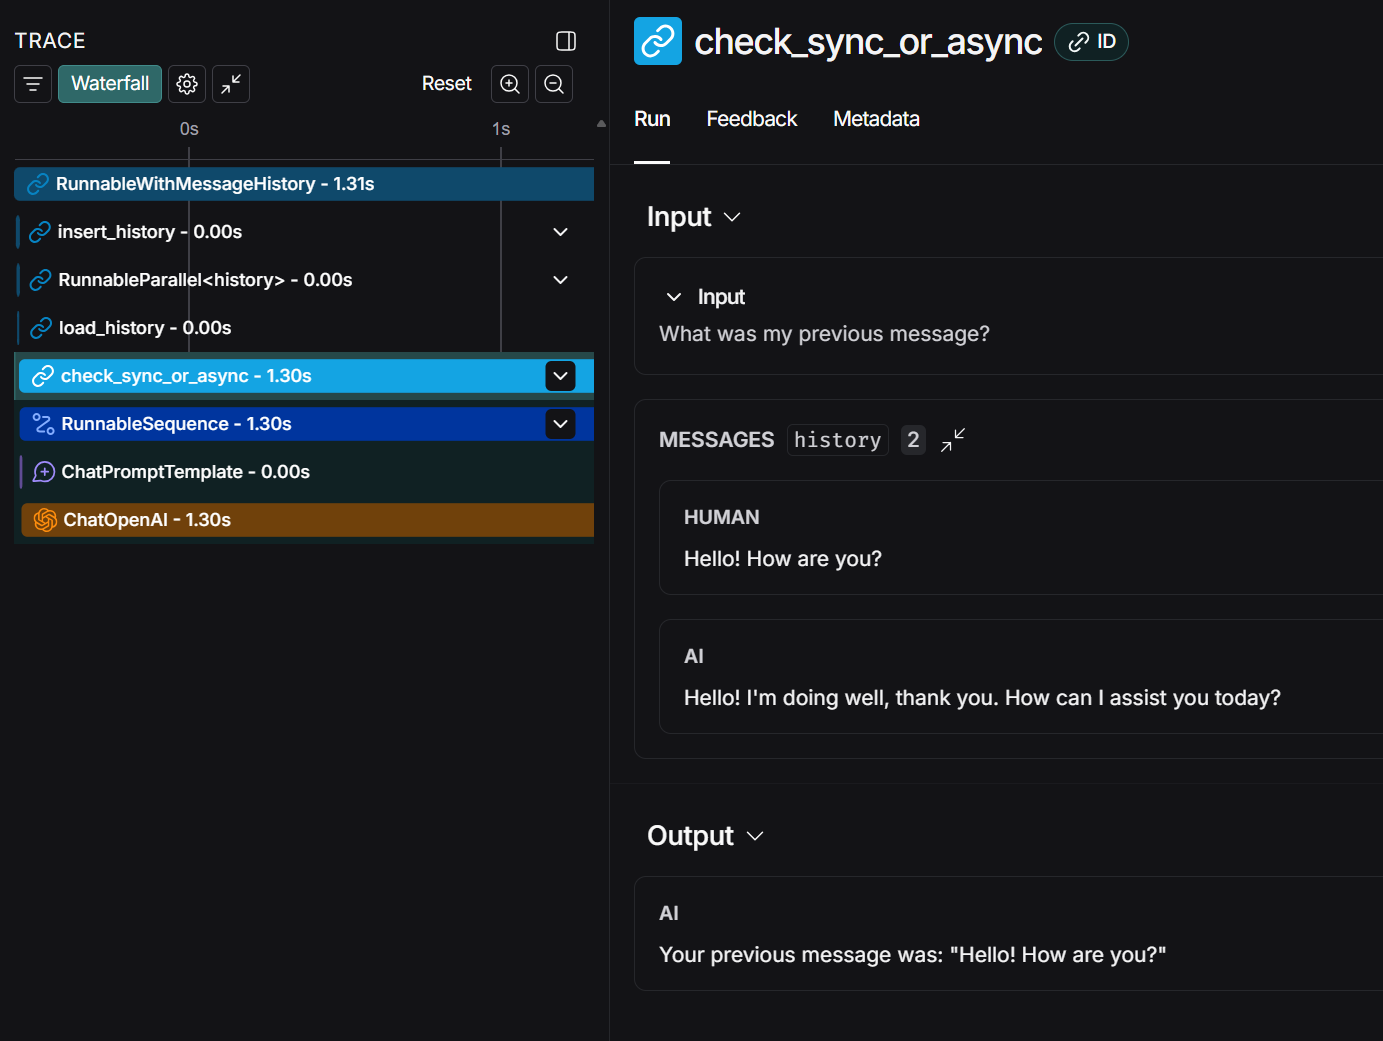

### Approach 2 : Multi-turn conversations
Building conversational applications requires managing message history and context:

In [ ]:
from langchain_core.messages import BaseMessage, HumanMessage , AIMessage ,SystemMessage
from langchain.chat_models import init_chat_model

In [3]:
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv(dotenv_path="../.env", verbose=True)

True

In [6]:
llm=init_chat_model("openai:gpt-4.1-nano", temperature=0)

In [ ]:
# Initialize conversation
messages:list[BaseMessage]=[
SystemMessage(content="You are a helpful AI assistant.")
]

In [ ]:
# Simulate multi-turn conversation

while True:
    user_input=input("You: ")
    if user_input.lower()=="quit":
        break

    # Add user message
    messages.append(HumanMessage(content=user_input))

    #Get model response
    response=llm.invoke(messages)

    # Add assistant response to history
    messages.append(response)

    print(f"Assistant:{response.content}")


Assistant:Hello! I'm doing well, thank you. How can I assist you today?
Assistant:Your previous message was: "hi how are you"


The AI’s response is appended to the messages list, which is then passed as input to the LLM.
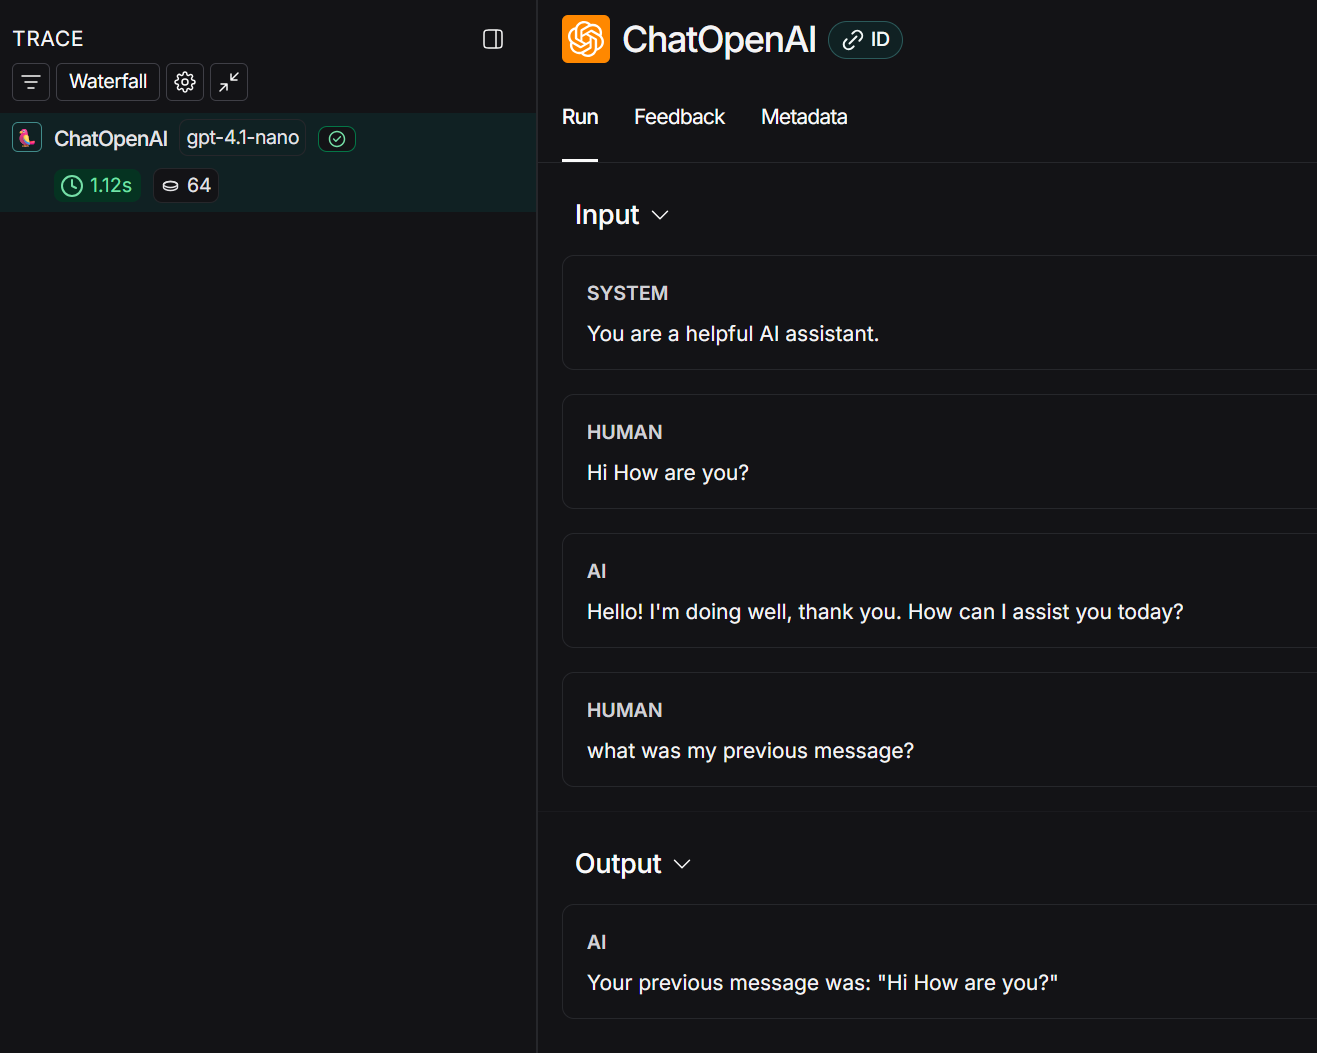

### Approach 3:short-term memory (thread-level persistence) 

Specify a checkpointer when creating an agent.


LangChain’s agent manages short-term memory as a part of your agent’s state.Short-term memory updates when the agent is invoked or a step is completed, and the state is read at the start of each step.

Note: Below code only works with v1-alpha release which is not official release version as  v1.0 will be released in October 2025.

Current version we used in the code above is v0 .Please refer requirements.txt file for current installed versions. Hence below code cannot be tested with current version

You can create a seperate virtual environment by installing below versions and test below code 
- pip install --pre -U langchain
- pip install --pre -U langchain-core
- pip install --pre -U langchain-openai
- pip install --pre -U langgraph

In [1]:
from langchain.agents import create_agent
from langgraph.checkpoint.memory import InMemorySaver
agent=create_agent(
    "openai:gpt-4.1-nano",
    tools=[],
    checkpointer=InMemorySaver(),
)
agent.invoke(
    {
        "messages":[{"role":"user","content":"Hello! How are you?"}]
    },
    {
        "configurable":{"thread_id":"1"},
    }
)
agent.invoke(
    {
        "messages":[{"role":"user","content":"What was my previous message"}]
    },
    {
        "configurable":{"thread_id":"1"},
    }
)


{'messages': [HumanMessage(content='Hello! How are you?', additional_kwargs={}, response_metadata={}, id='9d74e556-aa65-4870-a8c0-d1b15c50c115'),
  AIMessage(content="Hello! I'm doing well, thank you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 13, 'total_tokens': 29, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_04d3664870', 'id': 'chatcmpl-CFQZuNCDmWDLTVOkBvxPvDTvudeK8', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--60f6d4ea-cd3b-4c25-b2bb-6f32ad02fec6-0', usage_metadata={'input_tokens': 13, 'output_tokens': 16, 'total_tokens': 29, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_

The agent automatically saves and reuses prior messages for context.

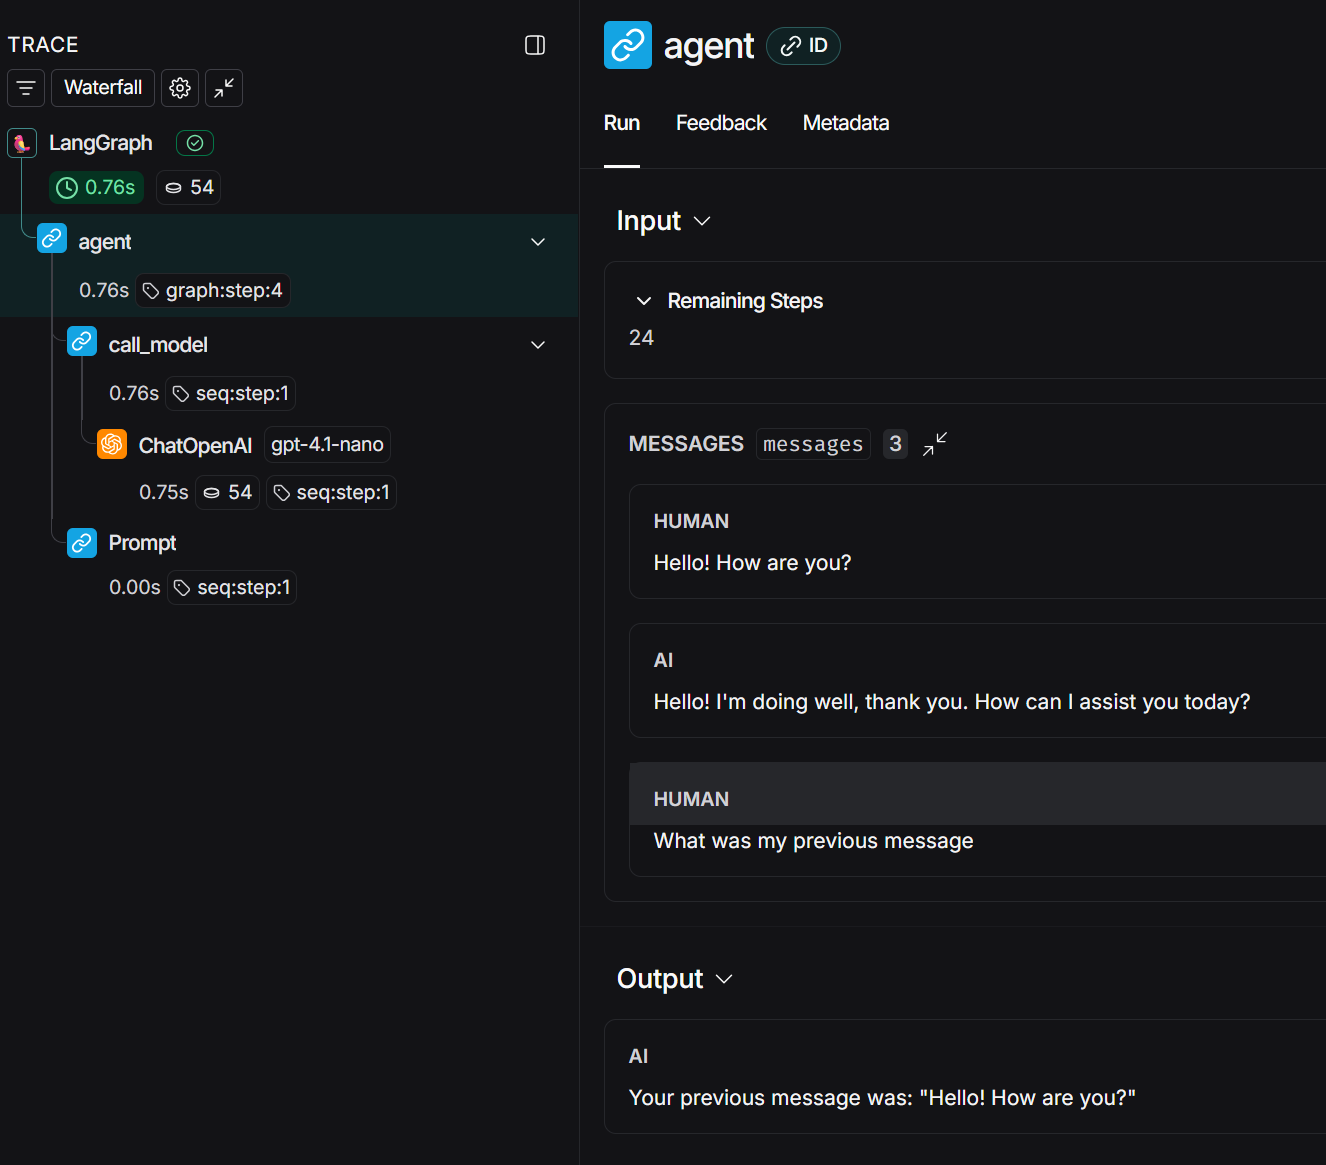